In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split
import os
import requests
import zipfile
from io import BytesIO
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
urls = [
    "http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/leaf1.zip",
    "http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/leaf2.zip",
    "http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/leaf3.zip",
    "http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/leaf4.zip",
    "http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/leaf5.zip",
    "http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/leaf6.zip",
    "http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/leaf7.zip",
    "http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/leaf8.zip",
    "http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/leaf9.zip",
    "http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/leaf10.zip",
    "http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/leaf11.zip",
    "http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/leaf12.zip",
    "http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/leaf13.zip",
    "http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/leaf14.zip",
    "http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/leaf15.zip"
]

dirs = [
    "leaf_dataset/ulmus_carpinifolia",
    "leaf_dataset/acer",
    "leaf_dataset/salix_aurita",
    "leaf_dataset/quercus",
    "leaf_dataset/alnus_incana",
    "leaf_dataset/betula_pubescens",
    "leaf_dataset/sericea",
    "leaf_dataset/populus_tremula",
    "leaf_dataset/ulmus_glabra",
    "leaf_dataset/sorbus_aucuparia",
    "leaf_dataset/salix_sinerea",
    "leaf_dataset/populus",
    "leaf_dataset/tilia",
    "leaf_dataset/sorbus_intermedia",
    "leaf_dataset/facus_silvatica"
]

if not os.path.exists('leaf_dataset'):
    os.makedirs('leaf_dataset')

for url, dir in zip(urls, dirs):
    response = requests.get(url)
    zip_file = zipfile.ZipFile(BytesIO(response.content))
    zip_file.extractall(dir)


In [6]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ]),
}

In [7]:
data_dir = 'leaf_dataset'

image_datasets = {x: datasets.ImageFolder(root=data_dir, transform=data_transforms[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes

train_size = 0.8
train_dataset, test_dataset = train_test_split(image_datasets['train'], train_size=train_size, shuffle=True, stratify=image_datasets['train'].targets)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


model = models.densenet121(pretrained=True)
num_classes = len(class_names)
model.classifier = nn.Linear(model.classifier.in_features, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


c:\Users\Micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/10, Loss: 0.7590, Test Accuracy: 0.7156
Epoch 2/10, Loss: 0.8571, Test Accuracy: 0.7467
Epoch 3/10, Loss: 0.6728, Test Accuracy: 0.7911
Epoch 4/10, Loss: 1.0610, Test Accuracy: 0.7822
Epoch 5/10, Loss: 0.9773, Test Accuracy: 0.8178
Epoch 6/10, Loss: 0.6165, Test Accuracy: 0.7022
Epoch 7/10, Loss: 0.1487, Test Accuracy: 0.9378
Epoch 8/10, Loss: 1.0607, Test Accuracy: 0.8711
Epoch 9/10, Loss: 0.2864, Test Accuracy: 0.8356
Epoch 10/10, Loss: 0.6674, Test Accuracy: 0.9200


In [9]:
print("Class Names:", class_names)

Class Names: ['acer', 'alnus_incana', 'betula_pubescens', 'facus_silvatica', 'populus', 'populus_tremula', 'quercus', 'salix_aurita', 'salix_sinerea', 'sericea', 'sorbus_aucuparia', 'sorbus_intermedia', 'tilia', 'ulmus_carpinifolia', 'ulmus_glabra']


In [10]:
file_path = 'model_leaf_detection.pth'
file_path2 = 'leaf_detection/leaf_detection_app/models/model_leaf_detection.pth'

if os.path.exists(file_path):
    os.remove(file_path)
if os.path.exists(file_path2):
    os.remove(file_path2)

torch.save(model.state_dict(), file_path)
torch.save(model.state_dict(), file_path2)

In [30]:
model.load_state_dict(torch.load('model_leaf_detection.pth'))

<All keys matched successfully>

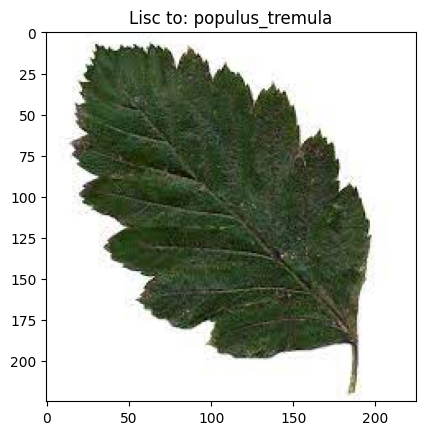

In [33]:
def load_and_process_image(image_path):
    image = Image.open(image_path)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)
    return input_batch

def show_prediction(image_path, model, class_names):
    input_image = load_and_process_image(image_path)

    with torch.no_grad():
        model.eval()
        output = model(input_image)
        _, predicted_idx = torch.max(output, 1)
        predicted_class = class_names[predicted_idx.item()]

    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'Lisc to: {predicted_class}')
    plt.show()

model = models.densenet121(pretrained=False)
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
model.load_state_dict(torch.load('model_leaf_detection.pth'))
model.eval()


sample_image_path = 'test_images\jarzabszwedzki.jpeg'

show_prediction(sample_image_path, model, class_names)
